In [1]:
from multiinstance.data.realData import buildDataset as buildReal
from multiinstance.utils import *

In [3]:
from multiinstance.ward_clustering import WardClustering

In [27]:
import matplotlib.pyplot as plt

In [31]:
from glob import glob
from tqdm.notebook import tqdm

In [34]:
import numpy as np

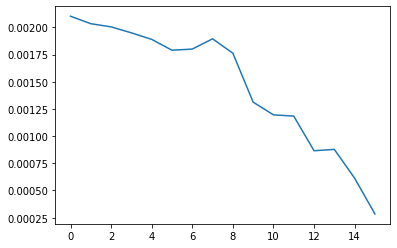

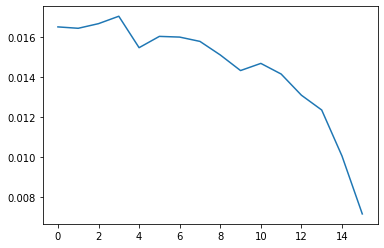

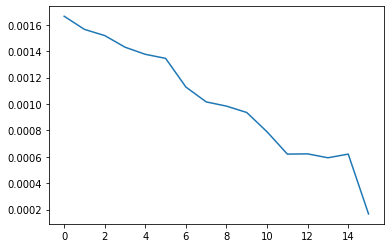

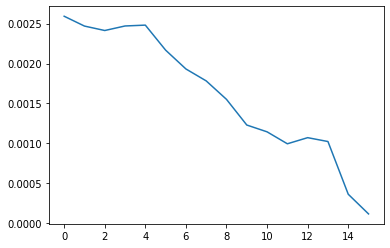

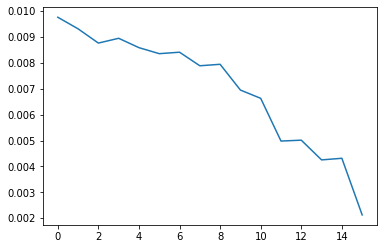

KeyboardInterrupt: 

In [40]:
for f in tqdm(glob("/ssdata/ClassPriorEstimationPrivate/data/rawDatasets/*.mat")):
    ds = buildReal(f,16,nPDistr=lambda: 1 + np.random.poisson(25),
                   nUDistr=lambda: 1 + np.random.poisson(75))

    ds = addTransformScores(ds)


    ds.alphaHats,ds.curves = getBagAlphaHats(ds,numbootstraps=100)

    ward = WardClustering(ds,randomPairing=True,numbootstraps=ds.alphaHats.shape[1])
    ward.cluster()

    meanvars = []
    for level in range(ward.alphaHatMat.shape[0]):
        c_labels = np.unique(ward.clusterAssignment[level]).astype(int)
        meanvars.append(ward.alphaHatMat[level,c_labels].var(1).mean())

    plt.plot(meanvars)
    plt.show()

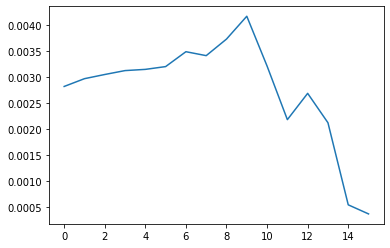

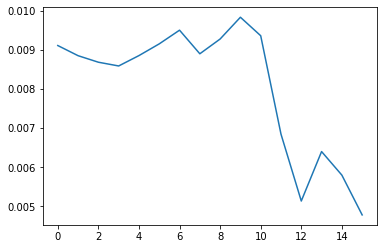

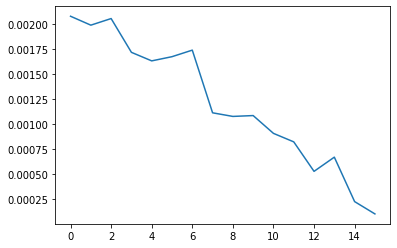

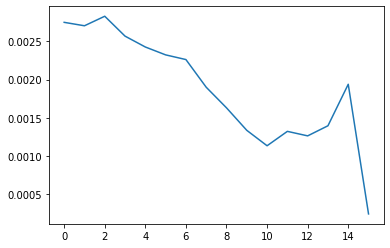

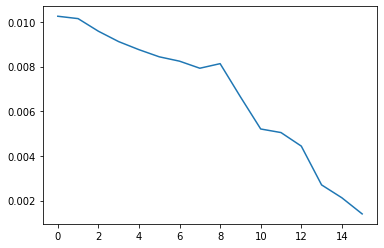

KeyboardInterrupt: 

In [41]:
for f in tqdm(glob("/ssdata/ClassPriorEstimationPrivate/data/rawDatasets/*.mat")):
    ds = buildReal(f,16,nPDistr=lambda: 1 + np.random.poisson(25),
                   nUDistr=lambda: 1 + np.random.poisson(75))

    ds = addTransformScores(ds)


    ds.alphaHats,ds.curves = getBagAlphaHats(ds,numbootstraps=100)

    ward = WardClustering(ds,randomPairing=False,numbootstraps=ds.alphaHats.shape[1])
    ward.cluster()

    meanvars = []
    for level in range(ward.alphaHatMat.shape[0]):
        c_labels = np.unique(ward.clusterAssignment[level]).astype(int)
        meanvars.append(ward.alphaHatMat[level,c_labels].var(1).mean())

    plt.plot(meanvars)
    plt.show()